# Example: image processing

### Liquid foam image processing steps before quantification: 
1) Remove speckle
2) Remove background
3) Phase segmentation
4) Masking
5) Remove small regions and holes (salt and pepper)
6) Bubble segmentation
7) Remove bubbles at the edges

In [1]:
# Import standard libraries
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imsave, imread
#import csv

# Import FoamQuant modules
from Package.Basic.RangeList import RangeList
from Package.Basic.ReadRaw import ReadRaw
from Package.Figure.Cut3D import Cut3D
from Package.Figure.RandomCmap import RandomCmap

from Package.Process.RemoveSpeckle import RemoveSpeckle
from Package.Process.RemoveBackground import RemoveBackground
from Package.Process.PhaseSegmentation import PhaseSegmentation
from Package.Process.MaskCyl import MaskCyl
from Package.Process.RemoveSpeckleBin import RemoveSpeckleBin
from Package.Process.BubbleSegmentation import BubbleSegmentation
from Package.Process.RemoveEdgeBubble import RemoveEdgeBubble

In [2]:
# Set default plot font size
plt.rc('font', size=25) 

In [3]:
# Read raw image
imName = 'foam_raw.tif'
im = imread(imName)

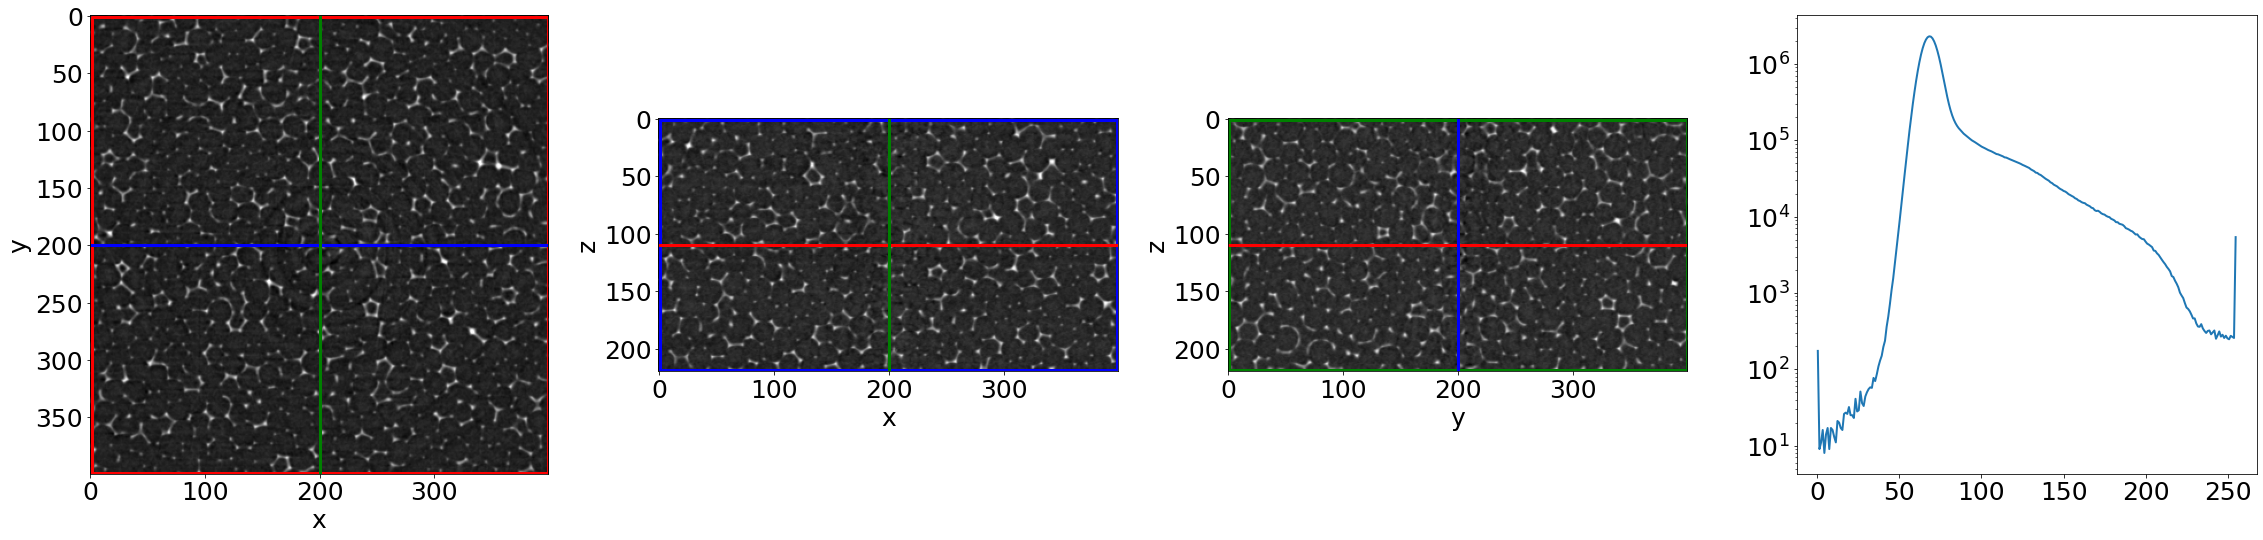

In [4]:
Cut3D(im,
      showcuts=True,
      showaxes=True,
      showhistogram=True,
      figblocksize=8)

## 1. Remove speckle

In [5]:
help(RemoveSpeckle)

Help on function RemoveSpeckle in module Package.Process.RemoveSpeckle:

RemoveSpeckle(image, method='median', radius=1, weight=0.1)



In [6]:
im = RemoveSpeckle(im, 
                   method='median', 
                   radius=2)

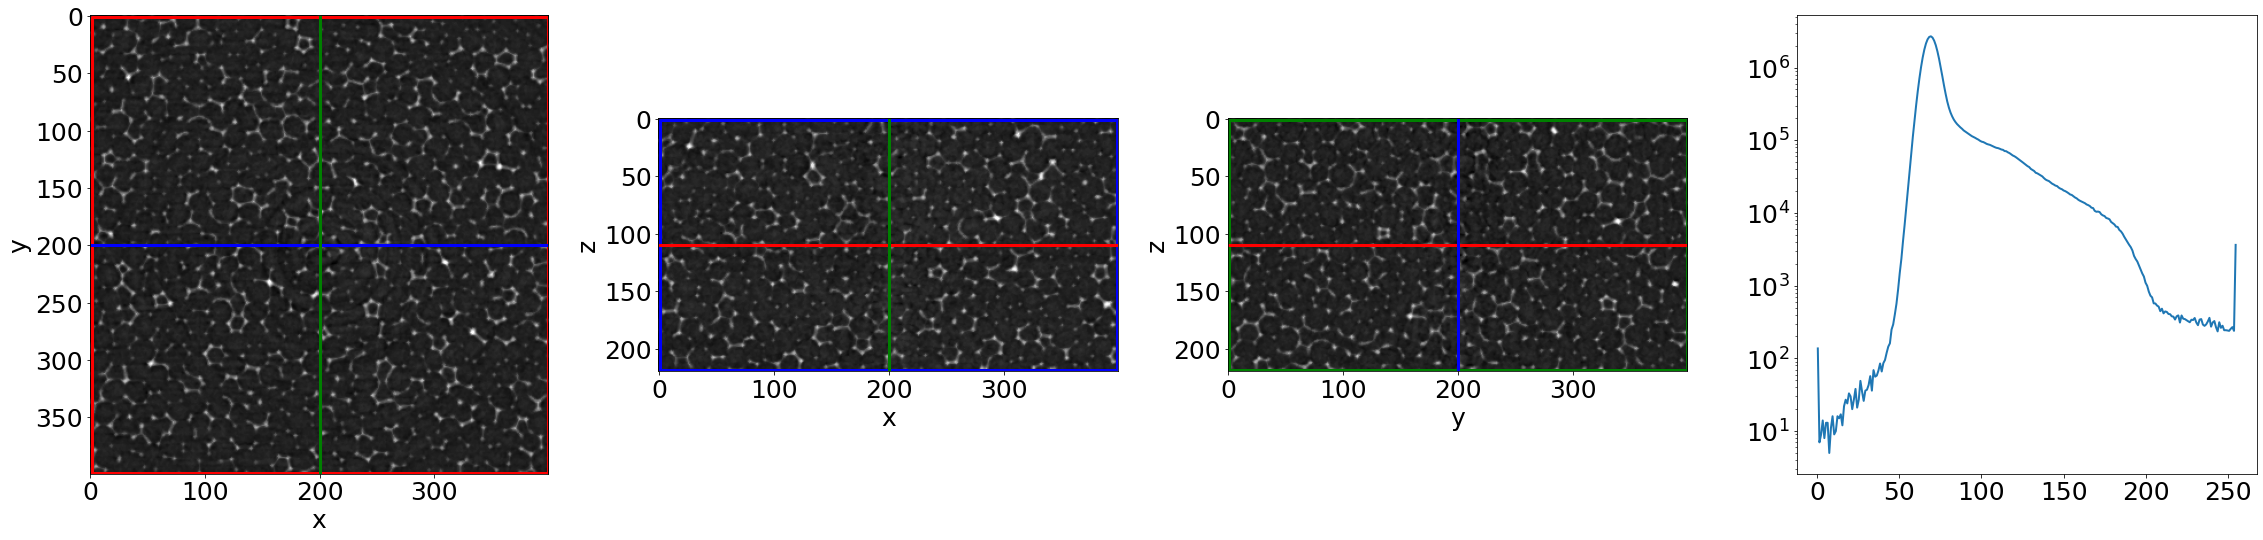

In [7]:
Cut3D(im,
      showcuts=True,
      showaxes=True,
      showhistogram=True,
      figblocksize=8)

## 2. Remove background

In [8]:
im = RemoveBackground(im, 
                      method='remove_gaussian', 
                      radius=20)

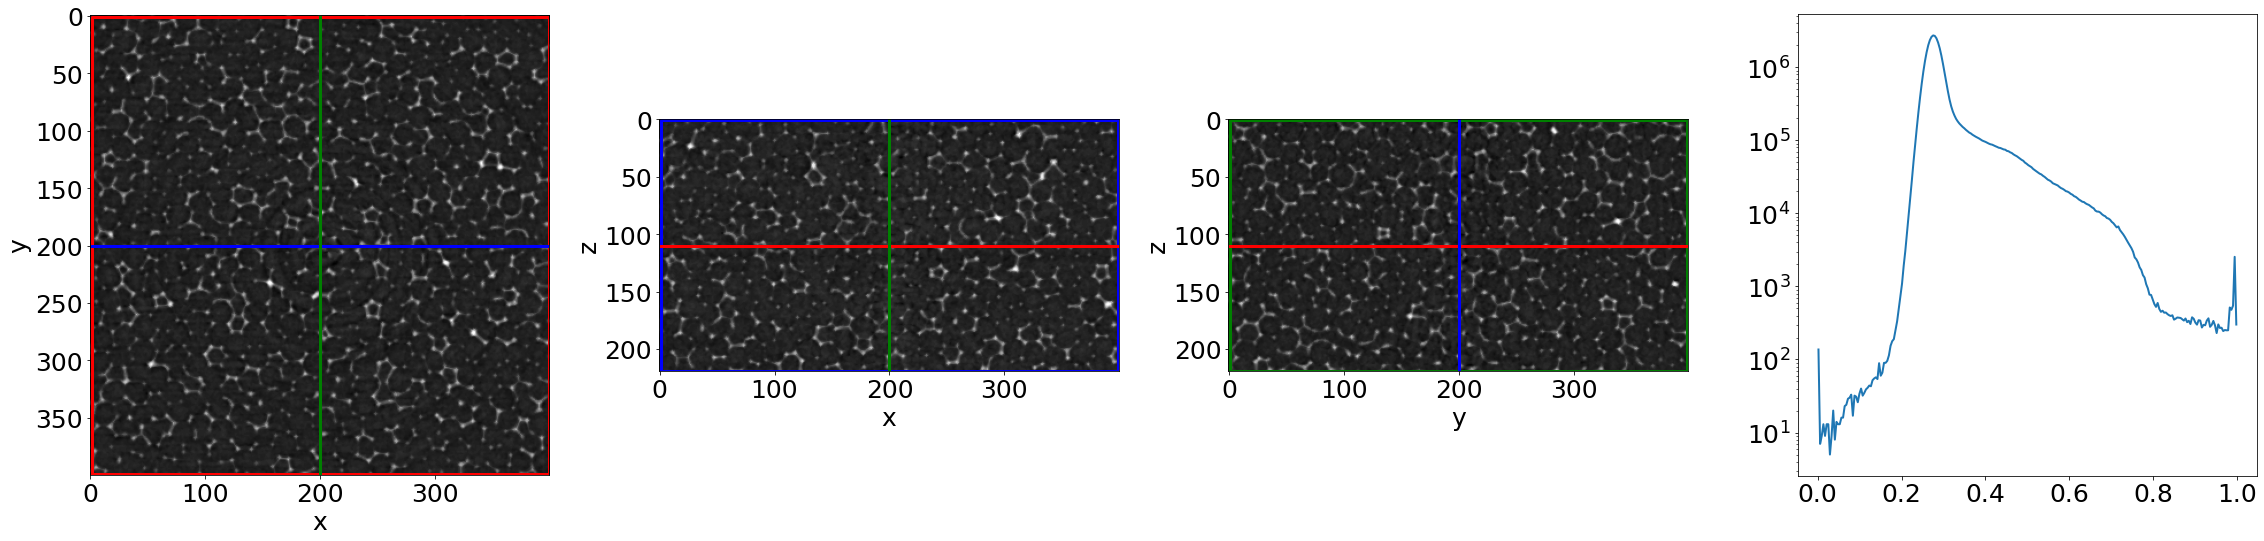

In [9]:
Cut3D(im,
      showcuts=True,
      showaxes=True,
      showhistogram=True,
      figblocksize=8)

## 3. Phase segmentation

In [10]:
im, otsu = PhaseSegmentation(im, 
                       method='ostu_global',
                       returnotsu=True)

In [11]:
print(otsu)

0.384765625


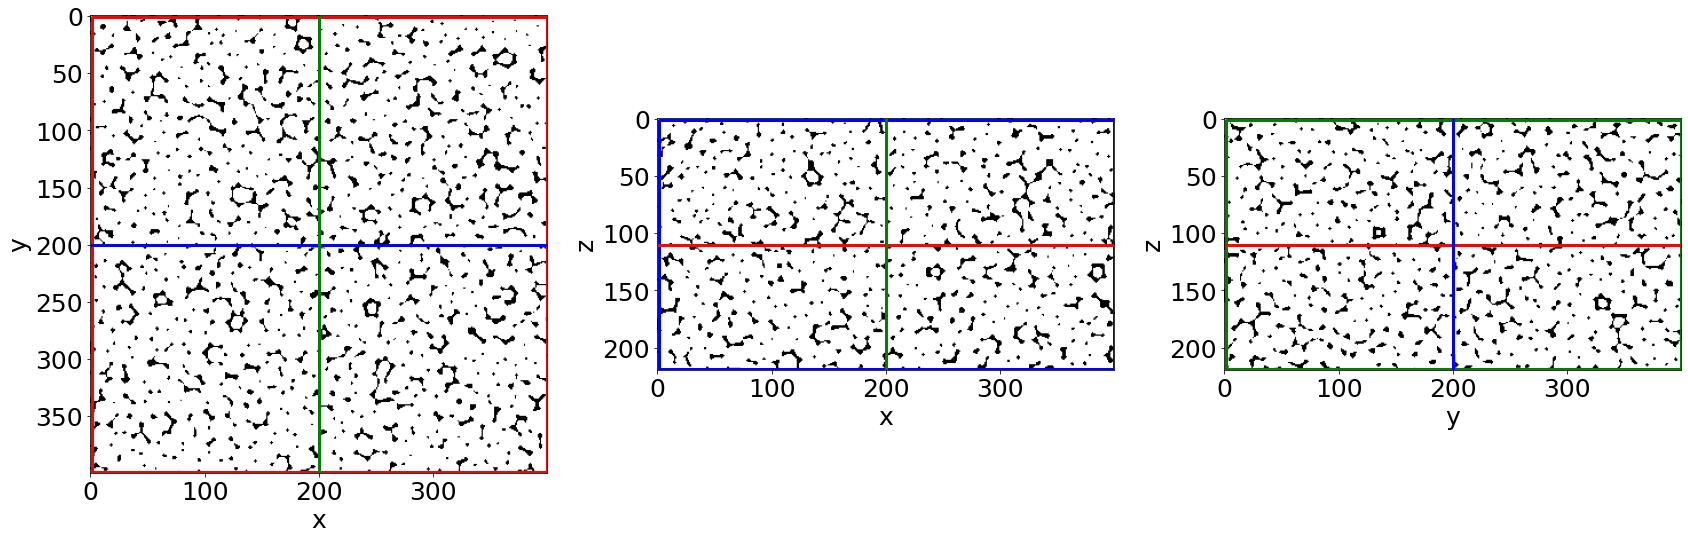

In [12]:
Cut3D(im,
      showcuts=True,
      showaxes=True,
      showhistogram=False,
      figblocksize=8)

## 4. Cylindrical mask

In [13]:
mask = MaskCyl(im)

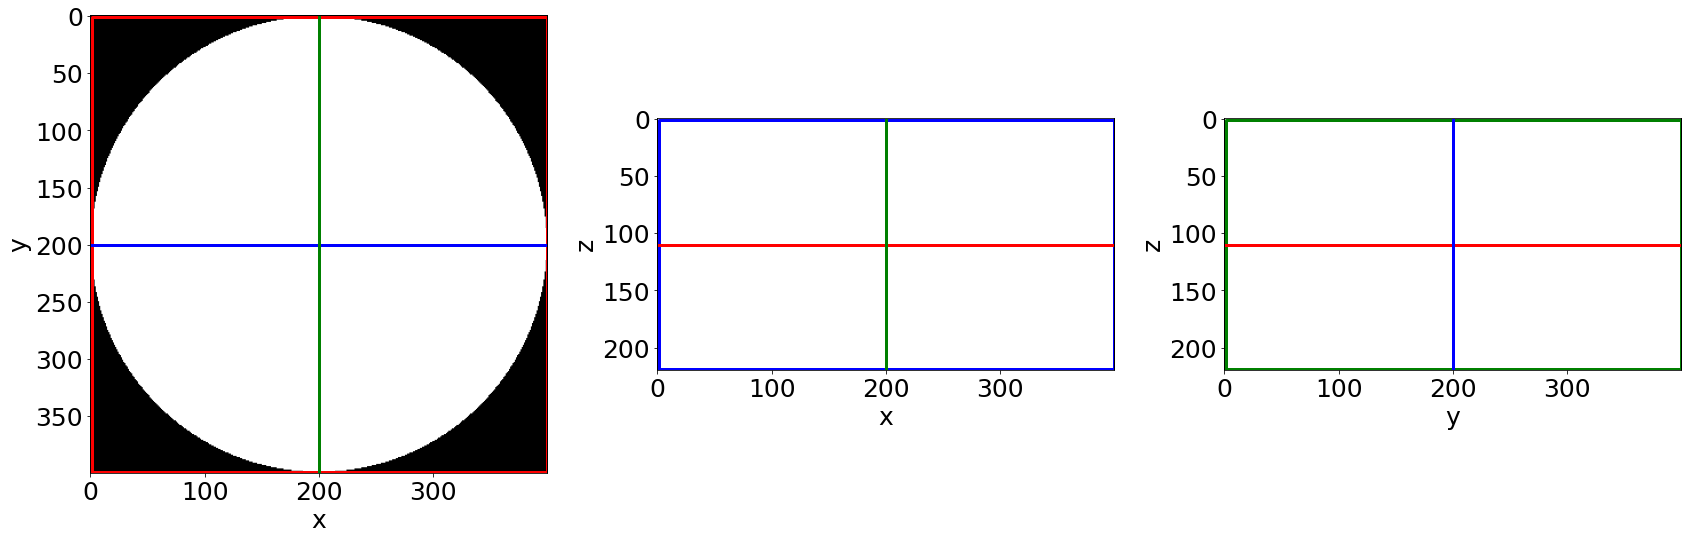

In [14]:
Cut3D(mask,
      showcuts=True,
      showaxes=True,
      showhistogram=False,
      figblocksize=8)

In [15]:
im = im*mask

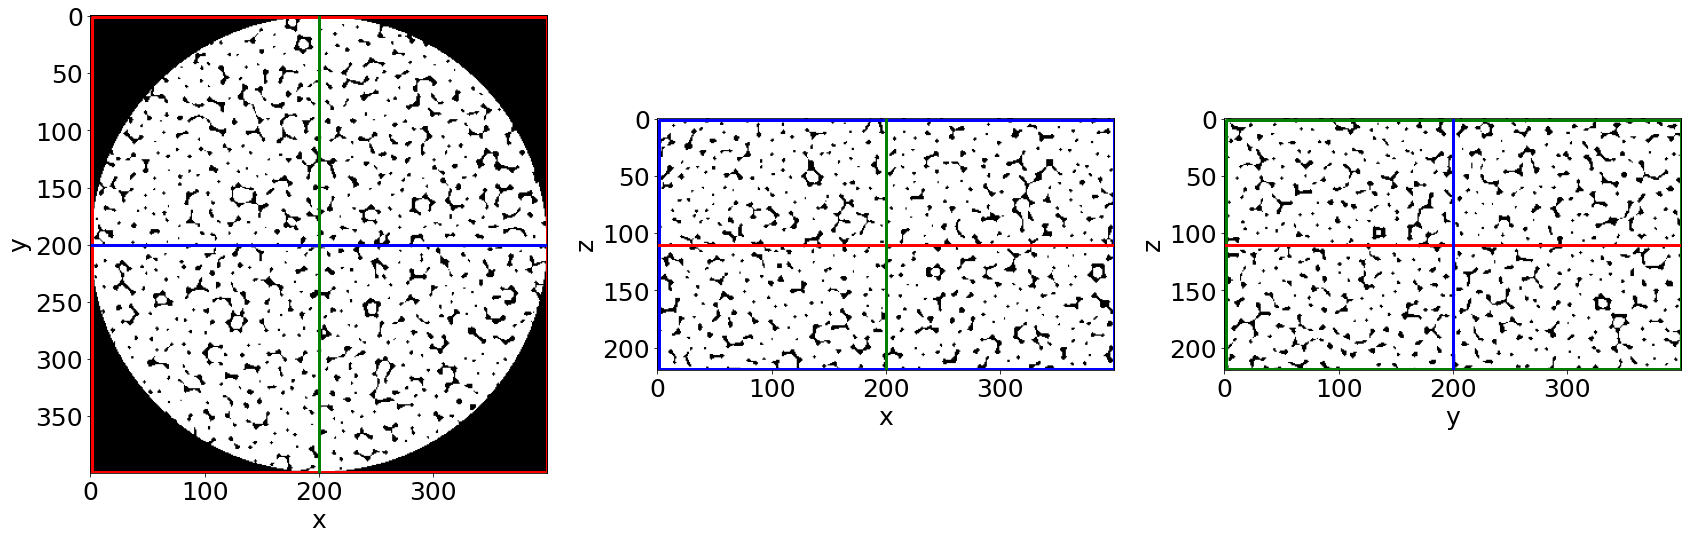

In [16]:
Cut3D(im,
      showcuts=True,
      showaxes=True,
      showhistogram=False,
      figblocksize=8)

## 5. Remove small objects and holes

In [17]:
im, vthobj, vthholes = RemoveSpeckleBin(im, 
                                        RemoveObjects=True, 
                                        RemoveHoles=True, 
                                        Verbose=True, 
                                        GiveVolumes=True)

Small object removed
Small holes removed


In [18]:
print('Threshold small object volume:',vthobj, '\nThreshold small holes volume:',vthholes) 

Threshold small object volume: 24702899 
Threshold small holes volume: 10497037


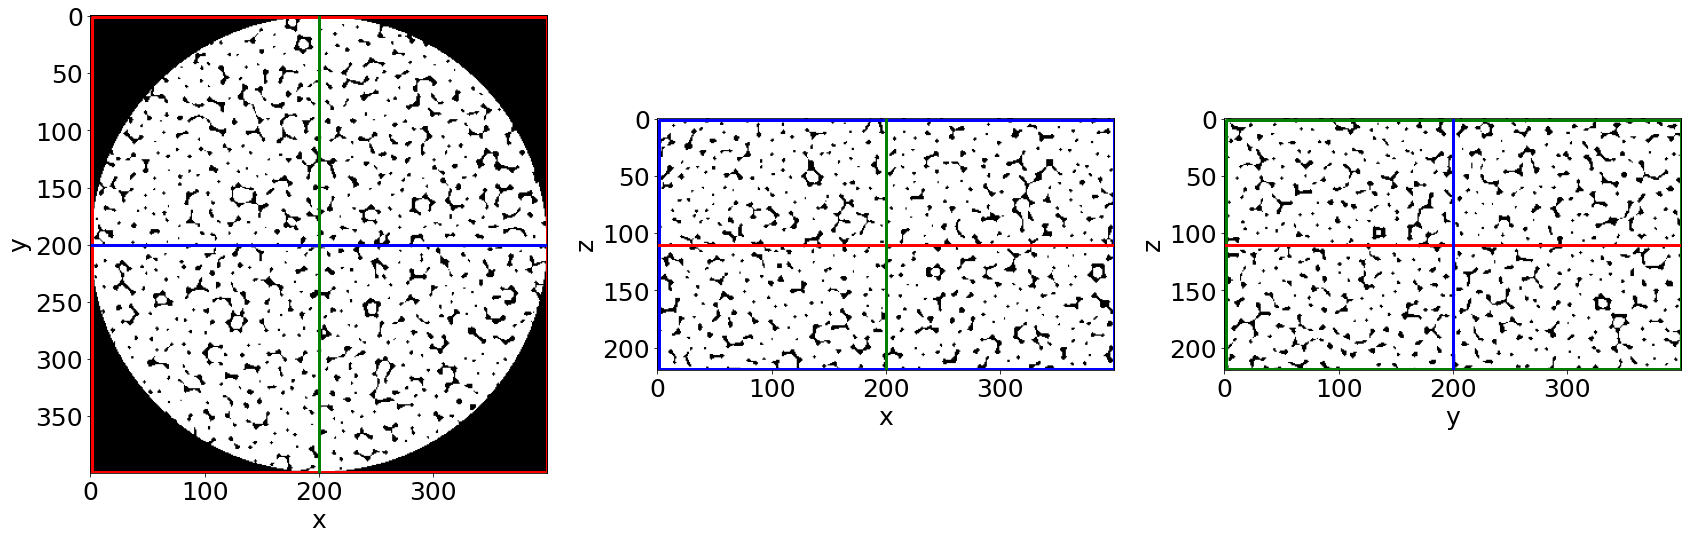

In [19]:
Cut3D(im,
      showcuts=True,
      showaxes=True,
      showhistogram=False,
      figblocksize=8)

## 6. Bubble segmentation

In [20]:
imlab = BubbleSegmentation(im, 
                        SigSeeds=1, 
                        SigWatershed=2, 
                        watershed_line=False, 
                        radius_opening=4,
                        verbose=False)

Number of labels: 1000


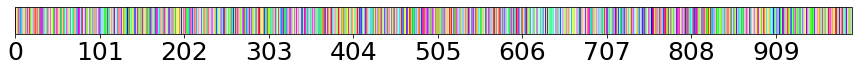

In [21]:
randomcmap = RandomCmap(1000)

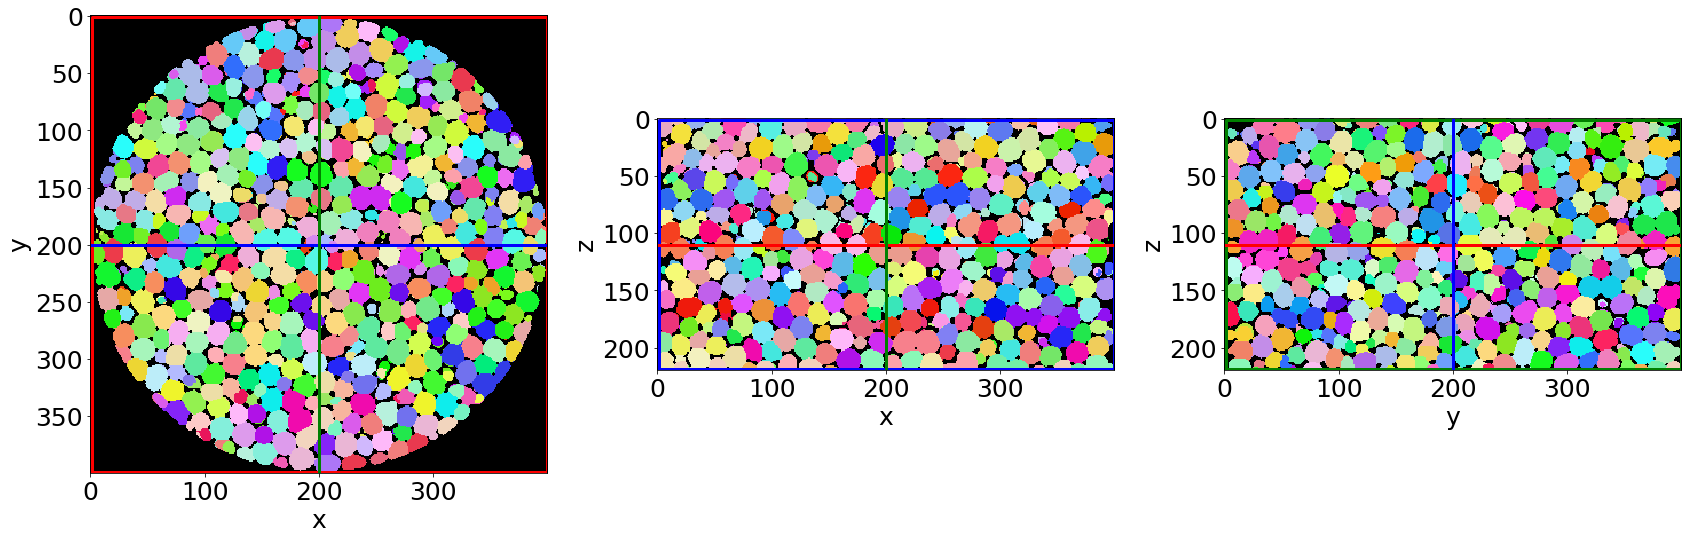

In [22]:
Cut3D(imlab,
      showcuts=True,
      showaxes=True,
      showhistogram=False,
      figblocksize=8,
      cmap=randomcmap,
      interpolation='nearest')

## 7. Remove bubbles at the edges

In [23]:
imlabnoedges = RemoveEdgeBubble(imlab,rpercent=0.95)

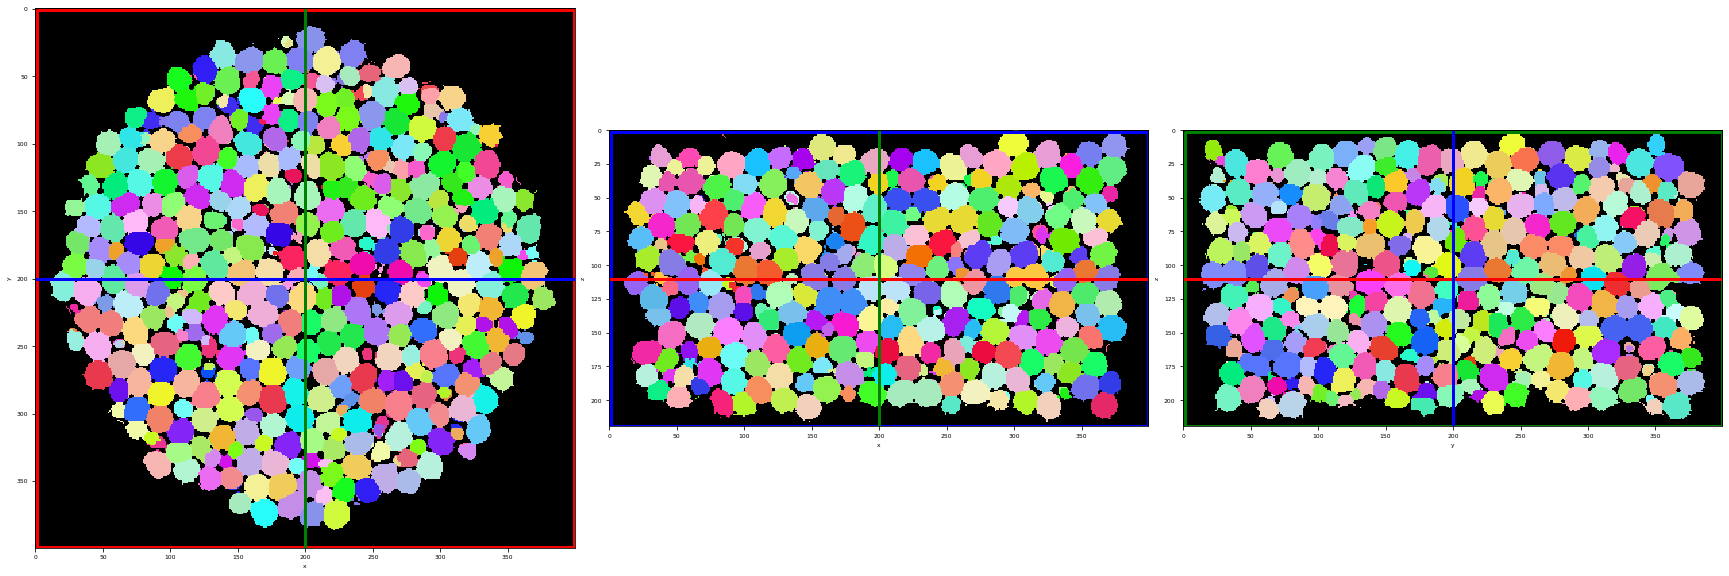

In [25]:
Cut3D(imlabnoedges,
      showcuts=True,
      showaxes=True,
      showhistogram=False,
      figblocksize=8,
      cmap=randomcmap,
      interpolation='nearest')